In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/fraudTrain.csv')

In [ ]:
df.shape


(66144, 23)

In [ ]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'],
        inplace = True)

In [ ]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,grocery_pos,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,entertainment,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,gas_transport,45.00,M,MT,1939.0,Patent attorney,0.0
4,misc_pos,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


In [ ]:
df.isna().sum()

category    0
amt         0
gender      0
state       0
city_pop    1
job         1
is_fraud    1
dtype: int64

In [ ]:
df.dropna(inplace = True) #if there is any null values then use this

In [ ]:
#now we have to convert categorical values into unique values

In [ ]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [ ]:
category_df = pd.get_dummies(df['category'])

In [ ]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
category_df = (pd.get_dummies(df['category'])).astype('int')

In [ ]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.drop(columns =['category'], inplace = True)

In [ ]:
df.head()

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,45.00,M,MT,1939.0,Patent attorney,0.0
4,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


In [ ]:
df = pd.concat([df, category_df], axis=1)

In [ ]:
df.head()

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,M,MT,1939.0,Patent attorney,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,M,VA,99.0,Dance movement psychotherapist,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['gender'].replace({'F':1, 'M':0}, inplace = True)

In [ ]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI'], dtype=object)

In [ ]:
state_df = (pd.get_dummies(df['state'])).astype('int')

In [ ]:
df.drop(columns = ['state'], inplace = True)

In [ ]:
df.head()

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,1,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,1,149.0,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,0,4154.0,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1939.0,Patent attorney,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,0,99.0,Dance movement psychotherapist,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = pd.concat([df, state_df], axis=1)

In [ ]:
df.head()

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,Special educational needs teacher,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154.0,Nature conservation officer,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1939.0,Patent attorney,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0,99.0,Dance movement psychotherapist,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.job.unique().shape #the number of unique jobs

(477,)

In [ ]:
job_df = (pd.get_dummies(df['job'])).astype('int')

In [ ]:
df.drop(columns = ['job'], inplace = True)

In [ ]:
df.head()

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1939.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0,99.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df = pd.concat([df, job_df], axis = 1)

In [ ]:
df.shape

(66143, 545)

In [ ]:
#divide the dataset into target and non-target
X = df.drop(columns =['is_fraud'])
Y = df['is_fraud'] #target

In [ ]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,1,3495.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,4154.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1939.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0,99.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y.value_counts() #count of rows belonging to each type (here, 0 and 1)

is_fraud
0.0    65480
1.0      663
Name: count, dtype: int64

In [ ]:
#the above dataset is imbalanced so handle using SMOTE method
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, Y = smote.fit_resample(X, Y)

In [ ]:
Y.value_counts()

is_fraud
0.0    65480
1.0    65480
Name: count, dtype: int64

In [ ]:
X.shape

(130960, 544)

In [ ]:
X.describe()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
count,130960.000000,130960.000000,1.309600e+05,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,...,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000,130960.000000
mean,295.982487,0.521472,1.041964e+05,0.038997,0.037095,0.061110,0.019487,0.139783,0.036194,0.051558,...,0.006536,0.000298,0.000756,0.001283,0.001100,0.002657,0.000229,0.001100,0.000855,0.000183
std,368.645629,0.499541,3.476168e+05,0.193588,0.188996,0.239533,0.138229,0.346763,0.186774,0.221133,...,0.080583,0.017254,0.027484,0.035794,0.033142,0.051481,0.015134,0.033142,0.029232,0.013536
min,1.000000,0.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.541418,0.000000,7.250000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.890000,1.000000,2.388268e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,458.702075,1.000000,2.484000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12788.070000,1.000000,2.906700e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [ ]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000310,1,0.001194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008308,1,0.000043,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.017135,0,0.001421,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003441,0,0.000659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003203,0,0.000026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)
#what is stratify?

In [ ]:
X_train.shape, X_test.shape

((104768, 544), (26192, 544))

In [ ]:
Y_train.value_counts()

is_fraud
1.0    52384
0.0    52384
Name: count, dtype: int64

In [ ]:
Y_test.value_counts()
#stratify attribute allows test set also to have equal samples for both cases

is_fraud
1.0    13096
0.0    13096
Name: count, dtype: int64

In [ ]:
# building neural network
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    #input layer + hidden layer1
    keras.layers.Dense(300, input_shape = (544,), activation = 'relu'),
    #hidden layer2
    keras.layers.Dense(150, activation = 'relu'),
    #output layer
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 10, batch_size = 200)

#learn how keras works

Epoch 1/10
524/524 [==============================] - 4s 3ms/step - loss: 0.0734 - accuracy: 0.9752
Epoch 2/10
524/524 [==============================] - 2s 3ms/step - loss: 0.0211 - accuracy: 0.9938
Epoch 3/10
524/524 [==============================] - 2s 4ms/step - loss: 0.0181 - accuracy: 0.9949
Epoch 4/10
524/524 [==============================] - 2s 4ms/step - loss: 0.0164 - accuracy: 0.9953
Epoch 5/10
524/524 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 6/10
524/524 [==============================] - 2s 3ms/step - loss: 0.0141 - accuracy: 0.9958
Epoch 7/10
524/524 [==============================] - 2s 3ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 8/10
524/524 [==============================] - 2s 3ms/step - loss: 0.0118 - accuracy: 0.9964
Epoch 9/10
524/524 [==============================] - 2s 3ms/step - loss: 0.0112 - accuracy: 0.9964
Epoch 10/10
524/524 [==============================] - 3s 5ms/step - loss: 0.0103 - accuracy: 0.9967

In [ ]:
#model evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Model Accuracy:{accuracy * 100}')

819/819 [==============================] - 2s 2ms/step - loss: 0.0141 - accuracy: 0.9961
Model Accuracy:99.61438775062561


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               163500    
                                                                 
 dense_4 (Dense)             (None, 150)               45150     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 208801 (815.63 KB)
Trainable params: 208801 (815.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#make predictions
pred = model.predict(X_test)

819/819 [==============================] - 1s 2ms/step


In [ ]:
pred[:5] #values output given in probability values

array([[9.5216471e-01],
       [1.6989124e-13],
       [9.9998415e-01],
       [9.9999464e-01],
       [9.9999475e-01]], dtype=float32)

In [ ]:
binary_pred = (pred > 0.5).astype('int')

In [ ]:
binary_pred[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]])

In [ ]:
Y_test[:5]

88300    1.0
11582    0.0
89161    1.0
84523    1.0
66197    1.0
Name: is_fraud, dtype: float64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, binary_pred))
#huge diff between f1 scores indicates a bad model

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     13096
         1.0       0.99      1.00      1.00     13096

    accuracy                           1.00     26192
   macro avg       1.00      1.00      1.00     26192
weighted avg       1.00      1.00      1.00     26192



Text(50.722222222222214, 0.5, 'Actual')

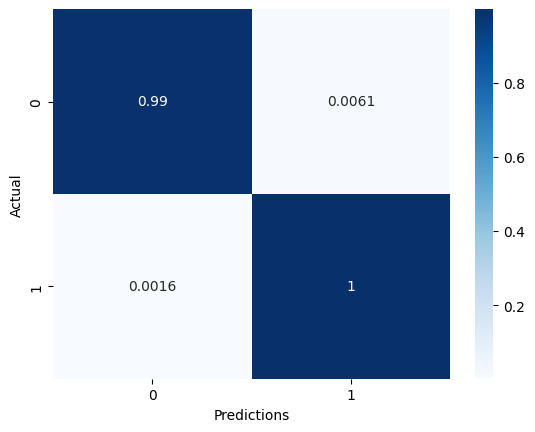

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(Y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predictions')
plt.ylabel('Actual')